In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sms
%matplotlib inline

In [5]:
df_airline=pd.read_csv(r'C:\Himanshu\ARIMA,SARIMA\airline_passengers.csv')

In [6]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [7]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [8]:
df_airline.shape

(145, 2)

In [9]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [10]:
df_airline.dropna(axis=0, inplace=True)

In [11]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [12]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [14]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [15]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [16]:
df_airline.set_index('Month', inplace=True)

In [17]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<AxesSubplot:xlabel='Month'>

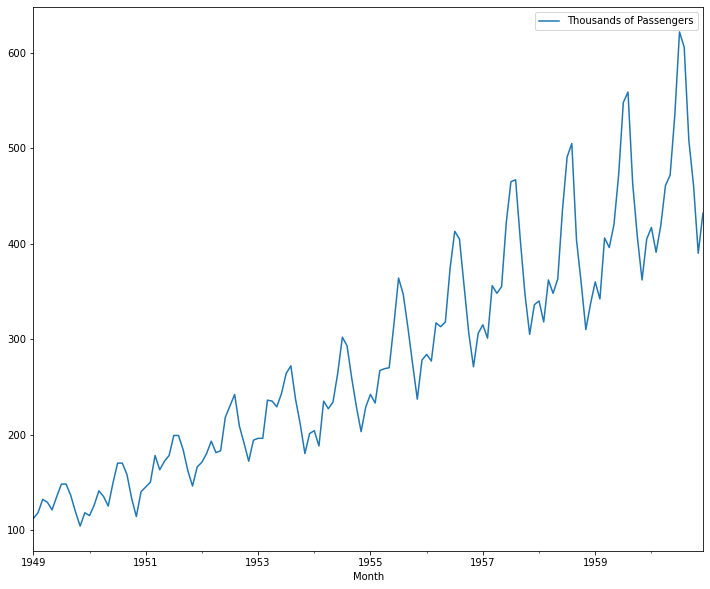

In [22]:
df_airline.plot(figsize=(12,10))

In [23]:
from statsmodels.tsa.stattools import adfuller

In [40]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [41]:
## To make it stationary we start doing differences

In [42]:
df_airline['Passengers First Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [43]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [44]:
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics: -2.8292668241699857
p- value: 0.05421329028382734
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [45]:
## Use Techniques Differencing
df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)

In [46]:
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statistics: -16.38423154246845
p- value: 2.732891850014516e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [48]:
### 12 months , so we gonna shift by 12 as its seasonal

In [49]:
df_airline['Passengers 12 Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)

In [50]:
adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statistics: -3.383020726492481
p- value: 0.011551493085514952
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [51]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

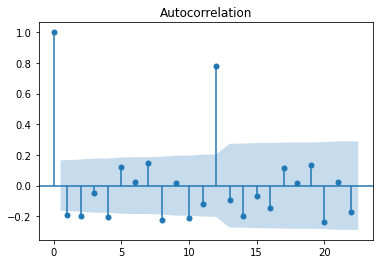

In [55]:
acf= plot_acf(df_airline['Passengers Second Difference'].dropna())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


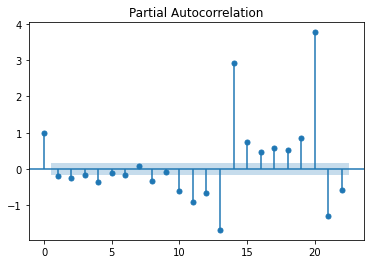

In [60]:
result = plot_pacf(df_airline['Passengers Second Difference'].dropna())

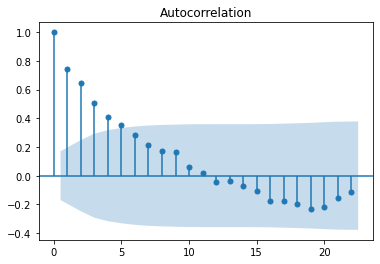

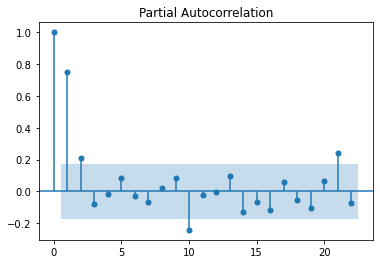

In [63]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [65]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN


In [66]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [67]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [68]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [69]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [70]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [71]:
train_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [92]:
model_ARIMA=ARIMA(train_data['Thousands of Passengers'],order=(10,2,0))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

In [93]:
model_Arima_fit=model_ARIMA.fit()
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARIMA Model Results                                  
======================================================================================
Dep. Variable:     D2.Thousands of Passengers   No. Observations:                   82
Model:                        ARIMA(10, 2, 0)   Log Likelihood                -357.239
Method:                               css-mle   S.D. of innovations             18.333
Date:                        Thu, 03 Mar 2022   AIC                            738.477
Time:                                02:52:03   BIC                            767.358
Sample:                            03-01-1949   HQIC                           750.072
                                 - 12-01-1955                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.0163      0.347      0.047      0.962      -0.665       0.697
ar.L1.D2.Thousands of Passengers     -0.5165      0.097     -5.300      0.000      -0.707      -0.325
ar.L2.D2.Thousands of Passengers     -0.7203      0.108     -6.650      0.000      -0.933      -0.508
ar.L3.D2.Thousands of Passengers     -0.4856      0.120     -4.032      0.000      -0.722      -0.250
ar.L4.D2.Thousands of Passengers     -0.7506      0.131     -5.717      0.000      -1.008      -0.493
ar.L5.D2.Thousands of Passengers     -0.5065      0.151     -3.360      0.001      -0.802      -0.211
ar.L6.D2.Thousands of Passengers     -0.5204      0.149     -3.500      0.000      -0.812      -0.229
ar.L7.D2.Thousands of Passengers     -0.3055      0.136     -2.250      0.024      -0.572      -0.039
ar.L8.D2.Thousands of Passengers     -0.5943      0.125     -4.744      0.000      -0.840      -0.349
ar.L9.D2.Thousands of Passengers     -0.2966      0.116     -2.556      0.011      -0.524      -0.069
ar.L10.D2.Thousands of Passengers    -0.4826      0.101     -4.765      0.000      -0.681      -0.284
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.9098           -0.5670j            1.0720           -0.0887
AR.2             0.9098           +0.5670j            1.0720            0.0887
AR.3             0.4844           -0.9210j            1.0406           -0.1729
AR.4             0.4844           +0.9210j            1.0406            0.1729
AR.5            -0.9676           -0.4146j            1.0527           -0.4356
AR.6            -0.9676           +0.4146j            1.0527            0.4356
AR.7            -0.6004           -0.8889j            1.0726           -0.3445
AR.8            -0.6004           +0.8889j            1.0726            0.3445
AR.9            -0.1335           -1.1349j            1.1427           -0.2686
AR.10           -0.1335           +1.1349j            1.1427            0.2686
------------------------------------------------------------------------------
"""

In [94]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA
Month,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,0.426829
1956-02-01,277.0,-7.0,-13.0,44.0,0.426829
1956-03-01,317.0,40.0,47.0,50.0,0.426829
1956-04-01,313.0,-4.0,-44.0,44.0,0.426829
1956-05-01,318.0,5.0,9.0,48.0,0.426829
1956-06-01,374.0,56.0,51.0,59.0,0.426829
1956-07-01,413.0,39.0,-17.0,49.0,0.426829
1956-08-01,405.0,-8.0,-47.0,58.0,0.426829
1956-09-01,355.0,-50.0,-42.0,43.0,0.426829


In [95]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [96]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [97]:
pred

1956-01-01   -18.695996
1956-02-01   -12.830782
1956-03-01    -2.329662
1956-04-01   -15.562178
1956-05-01    19.310694
1956-06-01    19.647893
1956-07-01   -13.271464
1956-08-01   -36.529600
1956-09-01     4.998670
1956-10-01    -9.913219
1956-11-01    28.288497
1956-12-01    24.352161
1957-01-01   -18.119968
1957-02-01    -3.741437
1957-03-01   -11.652379
1957-04-01     4.801846
1957-05-01    11.674246
1957-06-01     8.980623
1957-07-01   -18.932079
1957-08-01   -10.557283
1957-09-01     0.734726
1957-10-01     0.773630
1957-11-01    23.197621
1957-12-01    -1.112100
1958-01-01    -7.244779
1958-02-01    -7.413836
1958-03-01    -2.318086
1958-04-01     6.169884
1958-05-01     7.709313
1958-06-01    -0.056495
1958-07-01   -13.184565
1958-08-01    -0.771326
1958-09-01    -1.976044
1958-10-01     8.806763
1958-11-01     8.451415
1958-12-01    -4.117856
1959-01-01    -4.677780
1959-02-01    -5.031454
1959-03-01     2.660266
1959-04-01     3.850233
1959-05-01     4.913904
1959-06-01    -5

In [98]:
residuals

Month
1956-01-01    302.695996
1956-02-01    289.830782
1956-03-01    319.329662
1956-04-01    328.562178
1956-05-01    298.689306
1956-06-01    354.352107
1956-07-01    426.271464
1956-08-01    441.529600
1956-09-01    350.001330
1956-10-01    315.913219
1956-11-01    242.711503
1956-12-01    281.647839
1957-01-01    333.119968
1957-02-01    304.741437
1957-03-01    367.652379
1957-04-01    343.198154
1957-05-01    343.325754
1957-06-01    413.019377
1957-07-01    483.932079
1957-08-01    477.557283
1957-09-01    403.265274
1957-10-01    346.226370
1957-11-01    281.802379
1957-12-01    337.112100
1958-01-01    347.244779
1958-02-01    325.413836
1958-03-01    364.318086
1958-04-01    341.830116
1958-05-01    355.290687
1958-06-01    435.056495
1958-07-01    504.184565
1958-08-01    505.771326
1958-09-01    405.976044
1958-10-01    350.193237
1958-11-01    301.548585
1958-12-01    341.117856
1959-01-01    364.677780
1959-02-01    347.031454
1959-03-01    403.339734
1959-04-01    392.1

<AxesSubplot:ylabel='Density'>

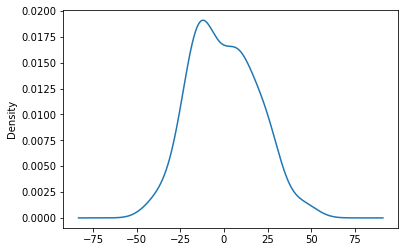

In [99]:
model_Arima_fit.resid.plot(kind='kde')

In [100]:
test_data['Predicted_ARIMA']=pred

C:\Users\himan\AppData\Local\Temp/ipykernel_38920/95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<AxesSubplot:xlabel='Month'>

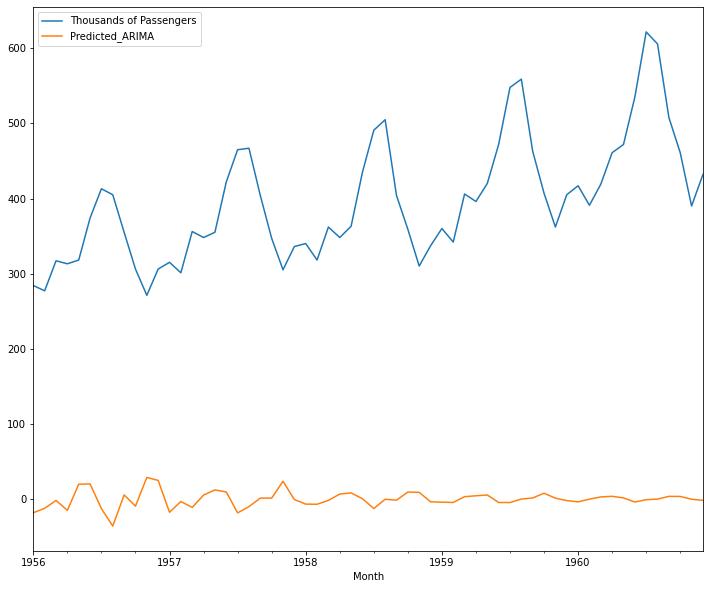

In [101]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot(figsize=(12,10))

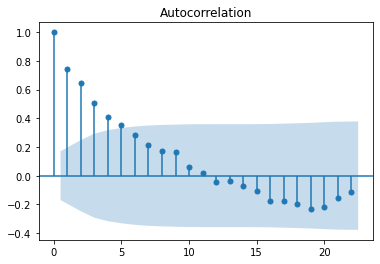

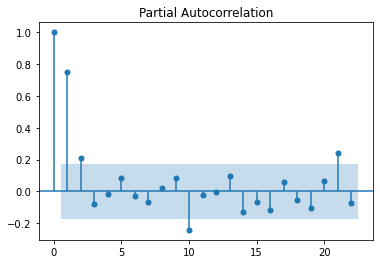

In [102]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [103]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [104]:
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [105]:
model_SARIMA_fit=model_SARIMA.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [106]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.241
Date:                             Thu, 03 Mar 2022   AIC                            548.481
Time:                                     11:40:26   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5992      0.938      0.639      0.523      -1.240       2.438
ar.L2          0.8313      0.232      3.578      0.000       0.376       1.287
ar.L3         -0.4536      0.895     -0.507      0.612      -2.207       1.300
ma.L1          0.1828      1.167      0.157      0.876      -2.105       2.471
ma.L2         -0.5351      1.266     -0.423      0.672      -3.015       1.945
ma.L3         -0.0985      0.385     -0.256      0.798      -0.853       0.656
ma.L4         -0.1271      0.338     -0.376      0.707      -0.790       0.536
ma.L5          0.2472      0.357      0.692      0.489      -0.453       0.948
sigma2        87.7220     81.403      1.078      0.281     -71.825     247.269
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [107]:
test_data.tail()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA
Month,,,,,
1960-08-01,606.0,-16.0,-103.0,47.0,-0.615668
1960-09-01,508.0,-98.0,-82.0,45.0,3.106039
1960-10-01,461.0,-47.0,51.0,54.0,2.964120
1960-11-01,390.0,-71.0,-24.0,28.0,-0.732258
1960-12-01,432.0,42.0,113.0,27.0,-2.251363


In [108]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [109]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred_Sarima

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


<AxesSubplot:xlabel='Month'>

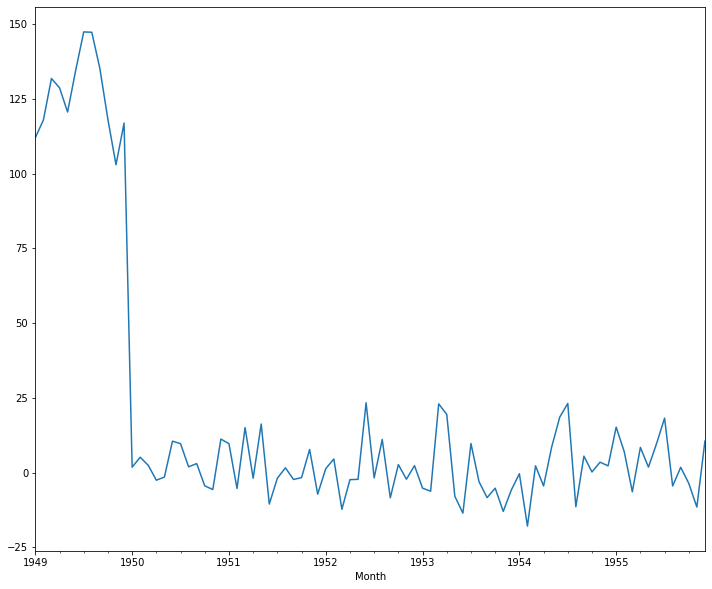

In [112]:
model_SARIMA_fit.resid.plot(figsize=(12,10))

<AxesSubplot:ylabel='Density'>

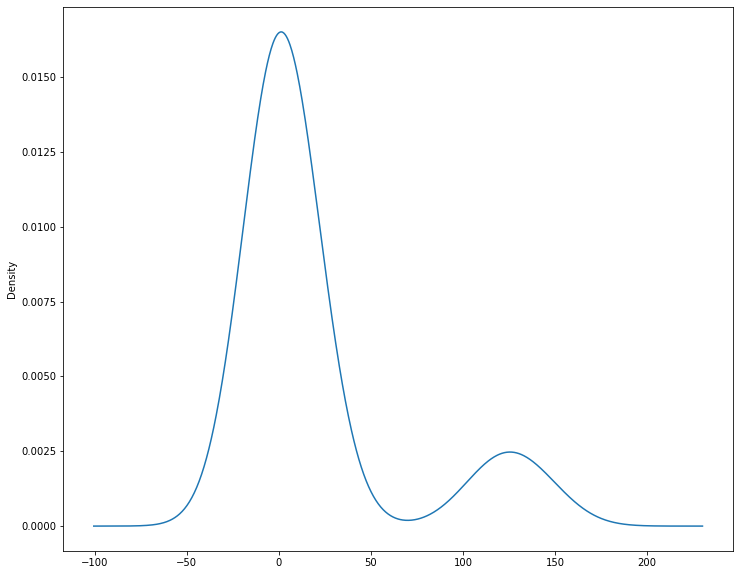

In [114]:
model_SARIMA_fit.resid.plot(kind='kde',figsize=(12,10))

In [115]:
test_data['Predicted_SARIMA']=pred_Sarima

C:\Users\himan\AppData\Local\Temp/ipykernel_38920/1367177785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


In [116]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,-18.695996,NaN
1956-02-01,277.0,-7.0,-13.0,44.0,-12.830782,NaN
1956-03-01,317.0,40.0,47.0,50.0,-2.329662,NaN
1956-04-01,313.0,-4.0,-44.0,44.0,-15.562178,NaN
1956-05-01,318.0,5.0,9.0,48.0,19.310694,NaN
1956-06-01,374.0,56.0,51.0,59.0,19.647893,NaN
1956-07-01,413.0,39.0,-17.0,49.0,-13.271464,403.399949
1956-08-01,405.0,-8.0,-47.0,58.0,-36.529600,385.073981
1956-09-01,355.0,-50.0,-42.0,43.0,4.998670,349.446898


<AxesSubplot:xlabel='Month'>

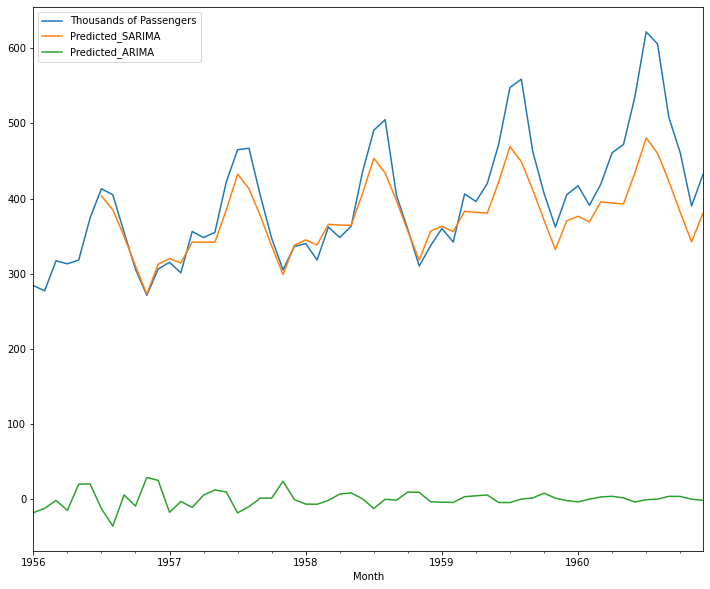

In [118]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot(figsize=(12,10))

In [120]:
## in seasonal Data - ARIMA failed 
## SARIMA works better with seasonal data